# Quantum Neural Network for Binary Classification of Breast Cancer Data
### 3.2 QNN_breast_cancer.ipynb
### James Saslow
### 4/27/2024


_______________________________________________________________________________________________________________



This Jupyter Notebook accomplishes the following tasks:
- Imports 'breast_cancer_dataset.csv', and splits & formats data into training & testing data
- Trains parameters on Quantum Neural Network model to perform binary classification
- Trains parameters on Convolutional Neural Network model to perform binary classification

The specifics of each task are outlined in more detail each corresponding subsection below.

In [1]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from qiskit.circuit import Parameter
from qiskit.quantum_info import Operator
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import UnitaryGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, qpy

# Custom Packages
import Qfuncs5 as qf                                    # My own custom Qiskit Package
from QuantumNeuralNetwork import QuantumNeuralNetwork   # Custom Made QNN Trainer for our PQC
from NeuralNetScore import nn_confusion                 # Generate confusion matrix for neural net binary classifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model


# Setting a Random Seed For Reproducability
np.random.seed(224)

# Importing 'breast_cancer_dataset.csv'

Here, we use pandas to import the 'breast_cancer_dataset.csv' file.

We then gather the 'Clump_thickness scaled', and 'Uniformity_of_cell_size scaled' as our two feature variables $x_{0}$, $x_{1}$, and extract their associated class labels by calling the 'binary targets' column.

Next, we split the dataset such that the first 17% of the data is training data and the last 83% is testing data.

In [2]:
# Importing 'breast_cancer_dataset.csv'
df = pd.read_csv('breast_cancer_dataset.csv')

# Displaying Pandas DataFrame
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Clump_thickness scaled,Uniformity_of_cell_size scaled,targets,binary targets
0,1,1,1,1,2,1.0,1,1,1,0.000000,0.000000,2,0
1,5,1,2,1,2,1.0,1,1,1,0.444444,0.000000,2,0
2,4,8,7,10,4,10.0,7,5,1,0.333333,0.777778,4,1
3,1,1,1,1,2,1.0,2,1,1,0.000000,0.000000,2,0
4,10,10,10,2,10,10.0,5,3,3,1.000000,1.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,2,1.0,1,1,1,0.222222,0.000000,2,0
695,1,1,1,1,2,1.0,3,1,1,0.000000,0.000000,2,0
696,1,1,1,1,2,1.0,3,1,1,0.000000,0.000000,2,0
697,5,10,10,10,4,10.0,5,6,3,0.444444,1.000000,4,1


In [3]:
# Gathering Data from Dataframe
X = df[["Clump_thickness scaled" , "Uniformity_of_cell_size scaled"]].values
binary_targets = df["binary targets"].values

# Partitioning Training Data
x_train = X[:120] # :120
binary_targets_train = binary_targets[:120]

# Partitioning Testing Data
x_test = X[120:]
binary_targets_test = binary_targets[120:]


# Loading in Parameterized Quantum Circuit and Training the Quantum Neural Network

Here, we load in our parameterized quantum circuit file 'parameterized_qc.qpy' and read it as a Qiskit *QuantumCircuit* class and draw the circuit to confirm that the PQC loaded in without any errors.

Next, we define QNN as a QuantumNeuralNetwork class, specify the number of epochs and learning rate, then use QuantumNeuralNetwork.train() to train the model parameters and assess model performance.

After, we can use QuantumNeuralNetwork.get() to retrieve the updated model parameters, QuantumNeuralNetwork.confusion_matrix() to assess model error, and QuantumNeuralNetwork.learning_graph() to plot the objective function as a function of epoch.

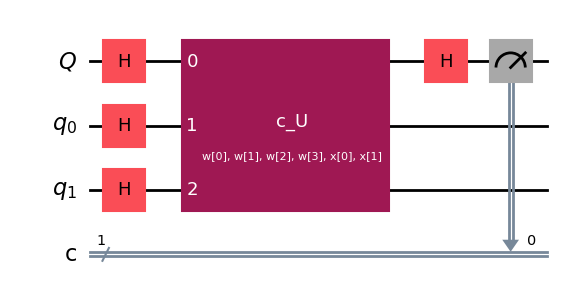

In [4]:
# Loading in the PQC
with open("parameterized_qc.qpy", "rb") as qpy_file_read:
    qc = qpy.load(qpy_file_read)[0]

qc.draw("mpl")

In [5]:
# Building Quantum Neural Network
QNN = QuantumNeuralNetwork(qc,x_train, binary_targets_train, x_test, binary_targets_test, \
epoch = 30)

# Training QNN
QNN.train()

Epoch 1
Cost Function :  0.03693865736706667
Model Error   :  5.833333333333333 %
omega_vec =  [3.01606769 2.73806812 0.15904774 2.21888382]
 
Epoch 2
Cost Function :  0.03670605156358333
Model Error   :  5.833333333333333 %
omega_vec =  [3.00727051 2.73016356 0.16676467 2.21233532]
 
Epoch 3
Cost Function :  0.03648237288768332
Model Error   :  5.833333333333333 %
omega_vec =  [2.99855761 2.72234625 0.17445465 2.20592635]
 
Epoch 4
Cost Function :  0.036238050833866664
Model Error   :  5.833333333333333 %
omega_vec =  [2.98993433 2.7146206  0.18212127 2.1996619 ]
 
Epoch 5
Cost Function :  0.03600453011615
Model Error   :  5.833333333333333 %
omega_vec =  [2.98138787 2.70697429 0.18975455 2.19353232]
 
Epoch 6
Cost Function :  0.03578652993478334
Model Error   :  5.833333333333333 %
omega_vec =  [2.97292395 2.69941178 0.19736711 2.18753825]
 
Epoch 7
Cost Function :  0.03554324957694999
Model Error   :  5.833333333333333 %
omega_vec =  [2.96455035 2.69194077 0.20495131 2.18168795]
 
E

In [6]:
# Getting Trained Model Parameterss
QNN.get()

array([2.79292145, 2.54097113, 0.37258879, 2.08064798])

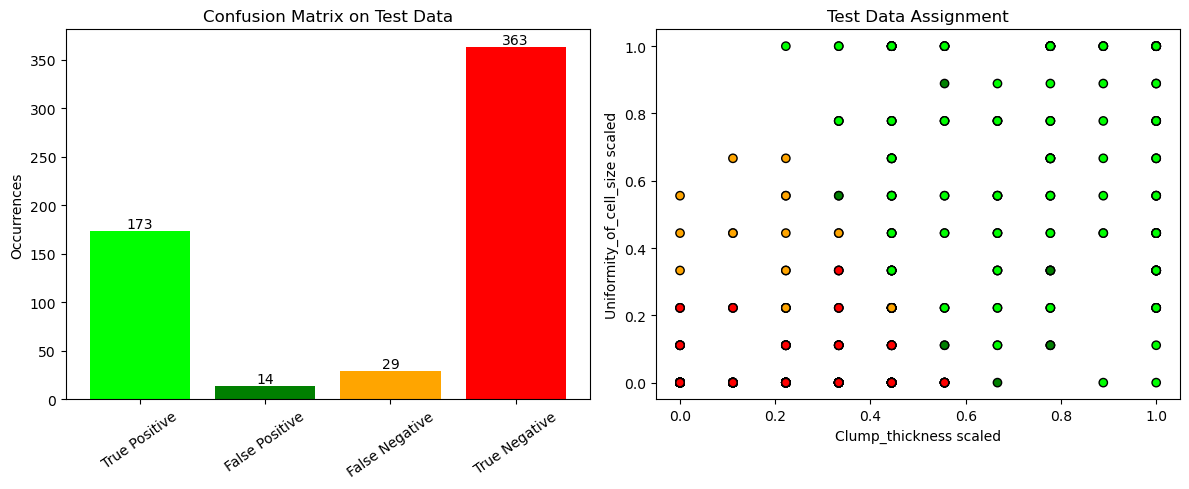

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,0.925734,0.925134,0.856436,0.962865,0.037135


In [12]:
# Plotting Confusion Matrix Data
QNN.confusion_matrix(xlabel = "Clump_thickness scaled", ylabel = "Uniformity_of_cell_size scaled", vertical = False)


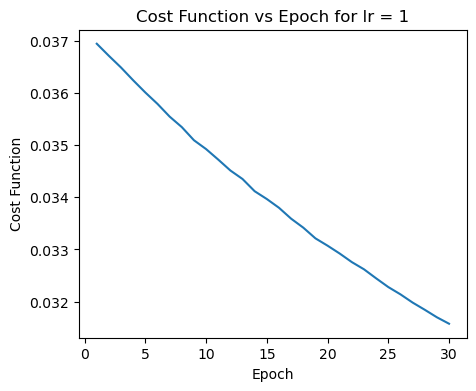

In [8]:
# Plotting the cost function as a function of epoch
QNN.learning_graph()

# Training Perceptron Neural Network using Tensorflow


Here, we implement a binary classifier via classical machine learning methods. In particular, we employ a perceptron neural network using the Tensorflow package. First, we build our classifier using two input neurons, one output neuron, and a sigmoid activation function. We use 'binary_crossentropy' for our loss function, since it is typically appropriate to use in classification tasks. And, we use stochastic gradient descent as our optimizer. 

In [9]:
# Building Perceptron Neural Network
model = Sequential()
model.add(Dense(units = 2 , activation= 'sigmoid'))
model.add(Dense(units = 1 , activation= 'sigmoid'))

# Specifying loss function and Training Method
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Training CNN
model.fit(x_train, binary_targets_train, epochs=100, batch_size= 1)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.6330 - loss: 0.6522
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.6192 - loss: 0.6326
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7370 - loss: 0.5689
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.6818 - loss: 0.5881 
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.6498 - loss: 0.6049
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.6691 - loss: 0.5832
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.6529 - loss: 0.5967
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6516 - loss: 0.5850
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5631 - loss: 0.6424 
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.6654 - loss: 0.5741 
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.6950 - loss: 0.5414
Epoch 12/100
120/120

In [10]:
# Assessing model predictions on test data
model_prediction = model.predict(x_test)


# Printing Model Prediction Output
print(model_prediction)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0.05223166]
 [0.17641324]
 [0.2987853 ]
 [0.17641324]
 [0.04360195]
 [0.8748974 ]
 [0.9023185 ]
 [0.8264219 ]
 [0.04360195]
 [0.8394675 ]
 [0.7822288 ]
 [0.8663013 ]
 [0.04360195]
 [0.2987853 ]
 [0.04360195]
 [0.06417574]
 [0.9059652 ]
 [0.86266935]
 [0.86266935]
 [0.04360195]
 [0.04360195]
 [0.04360195]
 [0.06417574]
 [0.2987853 ]
 [0.17641324]
 [0.9023185 ]
 [0.13686168]
 [0.8100555 ]
 [0.78727514]
 [0.08086675]
 [0.08086675]
 [0.06417574]
 [0.5558822 ]
 [0.08086675]
 [0.8394675 ]
 [0.8926008 ]
 [0.08086675]
 [0.08086675]
 [0.10426716]
 [0.6106311 ]
 [0.04360195]
 [0.08086675]
 [0.1714201 ]
 [0.04360195]
 [0.04360195]
 [0.08086675]
 [0.2987853 ]
 [0.08086675]
 [0.7768091 ]
 [0.05223166]
 [0.06417574]
 [0.06417574]
 [0.04360195]
 [0.38136047]
 [0.08086675]
 [0.04360195]
 [0.90056235]
 [0.8778845 ]
 [0.23395187]
 [0.9090306 ]
 [0.90474474]
 [0.22791958]
 [0.89808416]
 [0.05223166]
 [0.04360195]
 [0.10426716]
 [0.06417574]
 [0.78727514]
 [0.4696

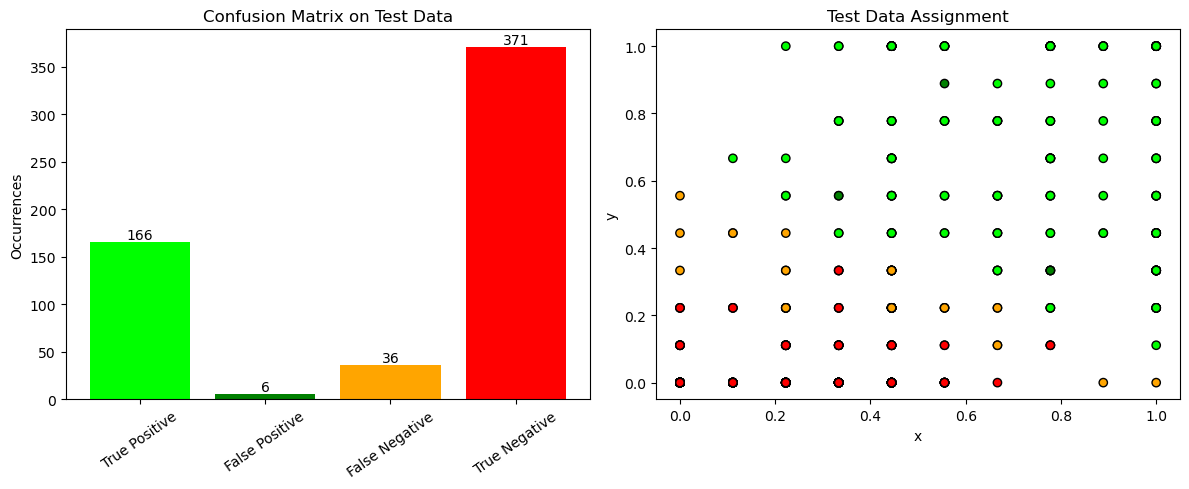

,Accuracy,Precision,True Positive Rate,Specificity,False Positive Rate
metrics,0.927461,0.965116,0.821782,0.984085,0.015915


In [11]:
# Plotting Confusion Matrix Data
nn_confusion(model_prediction, binary_targets_test, x_test)